## MLAU linear regression
---
This notebook is designed to be used in tandem with the corresponding Machine Learning Algorithms Unpacked article.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

### Why we need SQUARED residuals

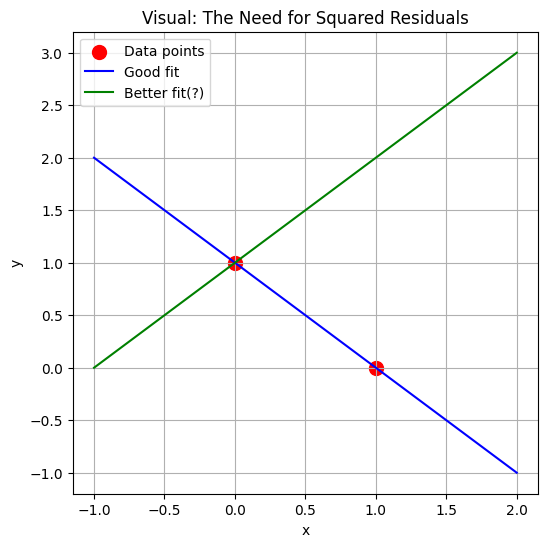

In [2]:
data = [(0, 1), (1, 0)]

x = np.linspace(-1, 2, 100)
y1 = 1 - x
y2 = x + 1

plt.figure(figsize=(6, 6))

plt.scatter(*zip(*data), color='red', s=100, label='Data points')

plt.plot(x, y1, label='Good fit', color='blue')
plt.plot(x, y2, label='Better fit(?)', color='green')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visual: The Need for Squared Residuals')

plt.legend()
plt.grid(True)
plt.show()

## Diabetes data

In [3]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [5]:
cols = ['age (years)', 'sex', 'bmi', 'bp average blood pressure', 's1 tc, total serum cholesterol',
        's2 ldl, low-density lipoproteins', 's3 hdl, high-density lipoproteins',
        's4 tch, total cholesterol / HDL', 's5 ltg, possibly log of serum triglycerides level',
        's6 glu, blood sugar level']

df = pd.DataFrame(diabetes_X, columns=cols)
df.head(10)

,age (years),sex,bmi,bp average blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level"
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [6]:
df['disease progression'] = diabetes_y
df.head()

,age (years),sex,bmi,bp average blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level",disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Time for a scatter plot:

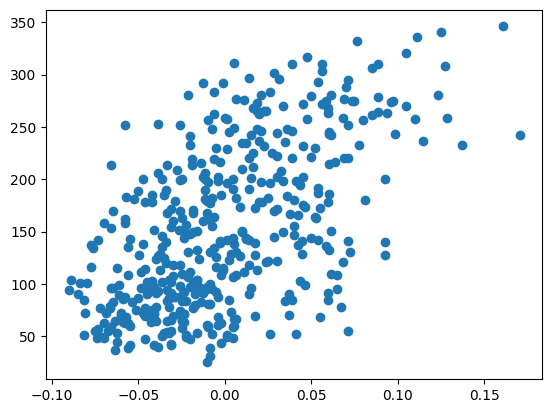

In [7]:
plt.scatter(df['bmi'], df['disease progression'])
plt.show()

We can try and make the plot look a bit better too:

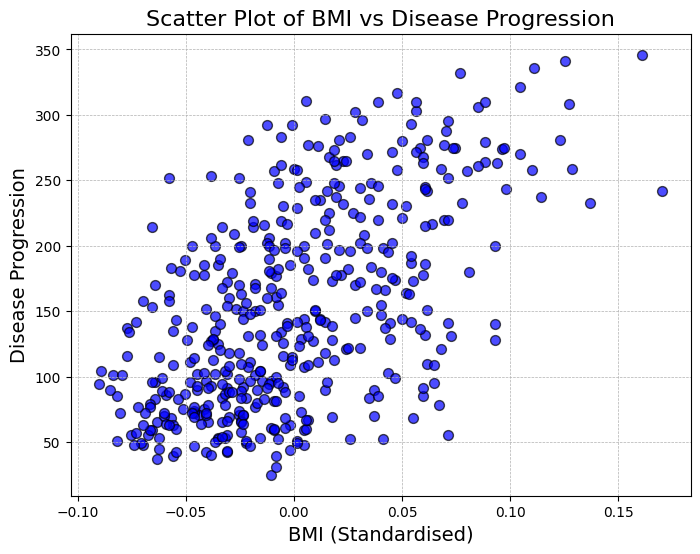

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['disease progression'], 
            color='b', edgecolors='k', alpha=0.7, s=50)

plt.title('Scatter Plot of BMI vs Disease Progression', fontsize=16)
plt.xlabel('BMI (Standardised)', fontsize=14)
plt.ylabel('Disease Progression', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

Model-building time!

In [9]:
linear = linear_model.LinearRegression()
linear.fit(df['bmi'].values.reshape(-1,1), diabetes_y)

LinearRegression()

In [10]:
y_pred = linear.predict(df['bmi'].values.reshape(-1,1))

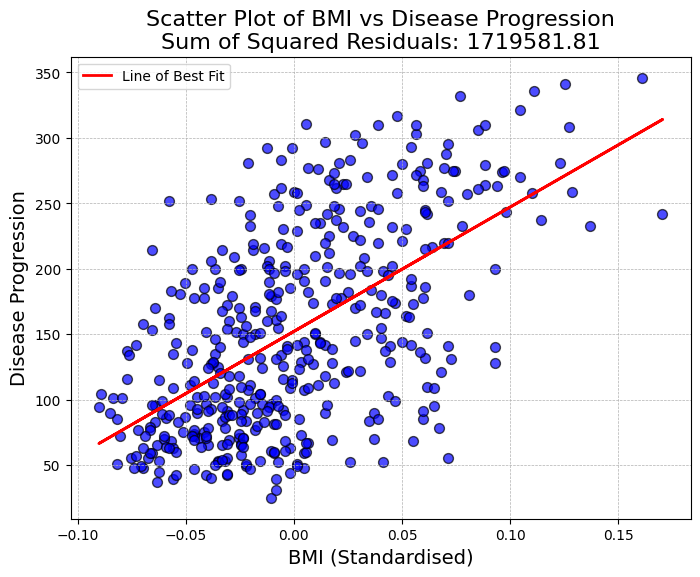

In [11]:
residuals = np.sum((diabetes_y - y_pred)**2)

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['disease progression'], 
            color='b', edgecolors='k', alpha=0.7, s=50)

plt.plot(df['bmi'], y_pred, color='r', linewidth=2, label='Line of Best Fit')

plt.title(f'Scatter Plot of BMI vs Disease Progression\nSum of Squared Residuals: {residuals:.2f}', fontsize=16)
plt.xlabel('BMI (Standardised)', fontsize=14)
plt.ylabel('Disease Progression', fontsize=14)
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

I encourage you to try making scatter plots with the other columns in the data. You can do this by making small tweaks in the code provided in this notebook. Have fun!